# <center> CS 178: Machine Learning &amp; Data Mining </center>
## <center> Final Project </center>
### <center> Fashion-MNIST Dataset </center>

### Import necessary packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

seed = 1234
np.random.seed(seed) 

### Load Fashion-MNIST dataset and split into training dataset and testing dataset.

In [2]:
# Load the features and labels for the MNIST dataset
mnist_X, mnist_y = fetch_openml('Fashion-MNIST', as_frame=False, return_X_y=True)
# Convert labels to integer data type
mnist_y = mnist_y.astype(int)

In [3]:
mnist_X_tr, mnist_X_te, mnist_y_tr, mnist_y_te = train_test_split(mnist_X, mnist_y, 
                                                                  test_size=0.25, random_state=seed, shuffle=True)

In [4]:
label_description = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

### Scale the feature dataset

In [5]:
scaler = StandardScaler()
mnist_X_tr = scaler.fit_transform(mnist_X_tr)
mnist_X_te = scaler.transform(mnist_X_te)

In [6]:
mnist_X_tr.shape

(52500, 784)

In [7]:
mnist_X_te.shape

(17500, 784)

### Visualize some training data

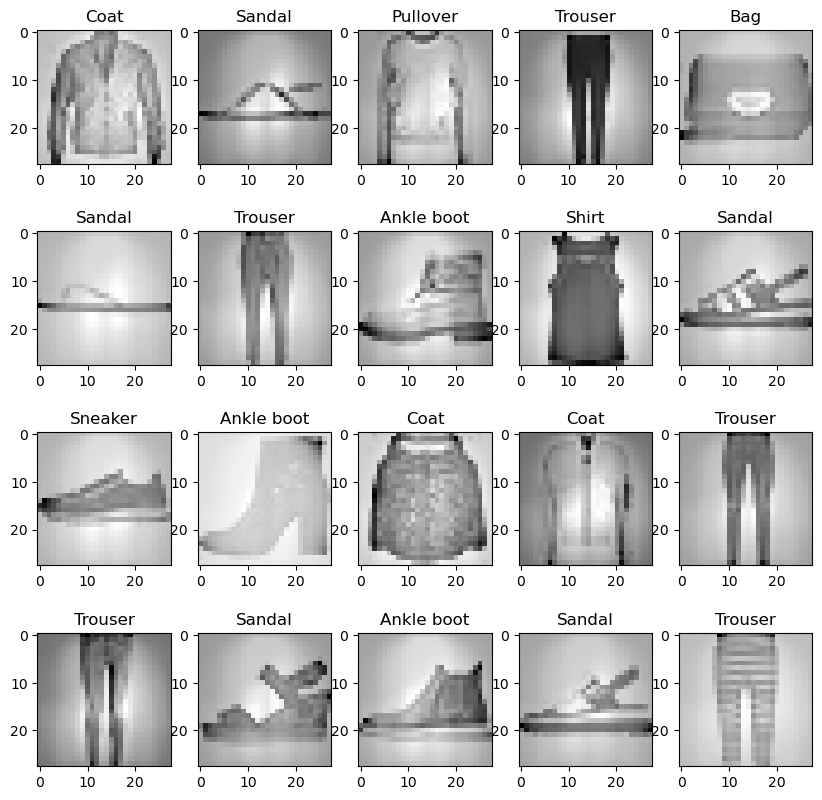

In [8]:
subplot_row = 4
subplot_col = 5

mnist_datapoint_index = 0
fig, axes = plt.subplots(subplot_row, subplot_col, figsize=(10, 10))


for subp_1 in range(subplot_row):
    for subp_2 in range(subplot_col):
        
        axes[subp_1, subp_2].imshow(np.reshape(mnist_X_tr[mnist_datapoint_index], (28, 28)), cmap=plt.cm.binary)
        axes[subp_1, subp_2].set_title(label_description[mnist_y_tr[mnist_datapoint_index]])
        
        mnist_datapoint_index += 1

# fig.tight_layout()

### Split testing dataset into validation dataset and testing dataset.

In [9]:
mnist_X_val = mnist_X_te[12500:17500]
mnist_y_val = mnist_y_te[12500:17500]

mnist_X_te = mnist_X_te[:12500]
mnist_y_te = mnist_y_te[:12500]

### All In One

In [20]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 1500]
n_tr = [100, 1000, 5000, 10000, 20000, 52500]

all_train_accuracy = []
all_val_accuracy = []

all_train_pred = []
all_val_pred = []


for c in Cs:
    for n in n_tr:
        classifier = LogisticRegression(C=c, penalty="l2", solver="sag", tol=0.1, random_state=seed)
        classifier.fit(mnist_X_tr[0:n, :], mnist_y_tr[0:n])

        all_train_pred.append([c, n, classifier.predict(mnist_X_tr)])
        train_accuracy = classifier.score(mnist_X_tr[0:n, :], mnist_y_tr)
        all_train_accuracy.append([c, n, train_accuracy])

        all_val_pred.append([c, n, classifier.predict(mnist_X_val)])
        val_accuracy = classifier.score(mnist_X_val, mnist_y_val)
        all_val_accuracy.append([c, n, val_accuracy])

In [26]:
def find_best_acc(acc_list):
    max_acc = [0, 0, 0]
    
    for acc in acc_list:
        if acc[2] > max_acc[2]:
            max_acc = acc
    print(max_acc)
    
find_best_acc(all_train_accuracy)
find_best_acc(all_val_accuracy)

[0.1, 100, 0.96]
[0.1, 52500, 0.8398]


In [27]:
for acc in all_val_accuracy:
    print(acc[2])

0.6666
0.7668
0.821
0.8282
0.8306
0.838
0.7186
0.7852
0.8322
0.8344
0.8338
0.8394
0.728
0.7858
0.8352
0.8356
0.8338
0.8398
0.7276
0.786
0.835
0.836
0.8338
0.8398
0.7272
0.786
0.835
0.836
0.8338
0.8398
0.7272
0.786
0.835
0.836
0.8338
0.8398
0.7272
0.786
0.835
0.836
0.8338
0.8398
0.7272
0.786
0.835
0.836
0.8338
0.8398
0.7272
0.786
0.835
0.836
0.8338
0.8398


In [12]:
print(all_val_accuracy)

[[0.001, 100, 0.838], [0.001, 1000, 0.838], [0.001, 5000, 0.838], [0.001, 10000, 0.838], [0.001, 20000, 0.838], [0.001, 52500, 0.838], [0.01, 100, 0.8394], [0.01, 1000, 0.8394], [0.01, 5000, 0.8394], [0.01, 10000, 0.8394], [0.01, 20000, 0.8394], [0.01, 52500, 0.8394], [0.1, 100, 0.8398], [0.1, 1000, 0.8398], [0.1, 5000, 0.8398], [0.1, 10000, 0.8398], [0.1, 20000, 0.8398], [0.1, 52500, 0.8398], [1, 100, 0.8398], [1, 1000, 0.8398], [1, 5000, 0.8398], [1, 10000, 0.8398], [1, 20000, 0.8398], [1, 52500, 0.8398], [10, 100, 0.8398], [10, 1000, 0.8398], [10, 5000, 0.8398], [10, 10000, 0.8398], [10, 20000, 0.8398], [10, 52500, 0.8398], [100, 100, 0.8398], [100, 1000, 0.8398], [100, 5000, 0.8398], [100, 10000, 0.8398], [100, 20000, 0.8398], [100, 52500, 0.8398], [500, 100, 0.8398], [500, 1000, 0.8398], [500, 5000, 0.8398], [500, 10000, 0.8398], [500, 20000, 0.8398], [500, 52500, 0.8398], [1000, 100, 0.8398], [1000, 1000, 0.8398], [1000, 5000, 0.8398], [1000, 10000, 0.8398], [1000, 20000, 0.8398]

### Tuning: C/Regularization strength
Fit the training data on varying C value where `C = [0.001, 0.01, 0.1, 1, 10, 100]`

In [34]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 1500]
Cs_train_accuracy = []
Cs_val_accuracy = []

Cs_train_pred = []
Cs_val_pred = []

for c in Cs:
    classifier = LogisticRegression(C=c, penalty="l2", solver="sag", tol=0.1, random_state=seed)
    classifier.fit(mnist_X_tr[0:n, :], mnist_y_tr[0:n])
    
    Cs_train_pred.append(classifier.predict(mnist_X_tr))
    train_accuracy = classifier.score(mnist_X_tr, mnist_y_tr)
    Cs_train_accuracy.append(train_accuracy)
    
    Cs_val_pred.append(classifier.predict(mnist_X_val))
    val_accuracy = classifier.score(mnist_X_val, mnist_y_val)
    Cs_val_accuracy.append(val_accuracy)

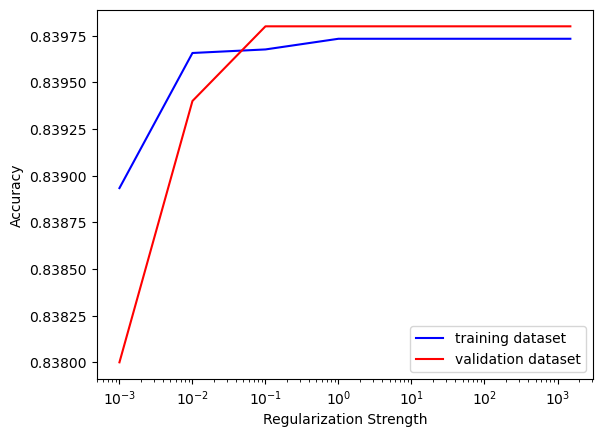

In [35]:
fig, axes = plt.subplots()

axes.set_xlabel('Regularization Strength')
axes.set_ylabel('Accuracy')

axes.semilogx(Cs, Cs_train_accuracy, color='blue', label='training dataset')
axes.semilogx(Cs, Cs_val_accuracy, color='red', label='validation dataset')

axes.legend()

#### Maximum Accuracy among regularization strength
Training accuracy: 

In [36]:
max_training_Cs_accuracy = max(Cs_train_accuracy)
index_max_training_Cs_accuracy = Cs_train_accuracy.index(max_training_Cs_accuracy)
print("Max training accuracy =", max_training_Cs_accuracy)
print("Regularization strength =", Cs[index_max_training_Cs_accuracy])

Max training accuracy = 0.8397333333333333
Regularization strength = 1


Validation accuracy:

In [37]:
max_val_Cs_accuracy = max(Cs_val_accuracy)
index_max_val_Cs_accuracy = Cs_val_accuracy.index(max_val_Cs_accuracy)
print("Max validation accuracy =", max_val_Cs_accuracy)
print("Regularization strength =", Cs[index_max_val_Cs_accuracy])

Max validation accuracy = 0.8398
Regularization strength = 0.1


#### Visualizing predicted label on validation dataset based on best accuracy

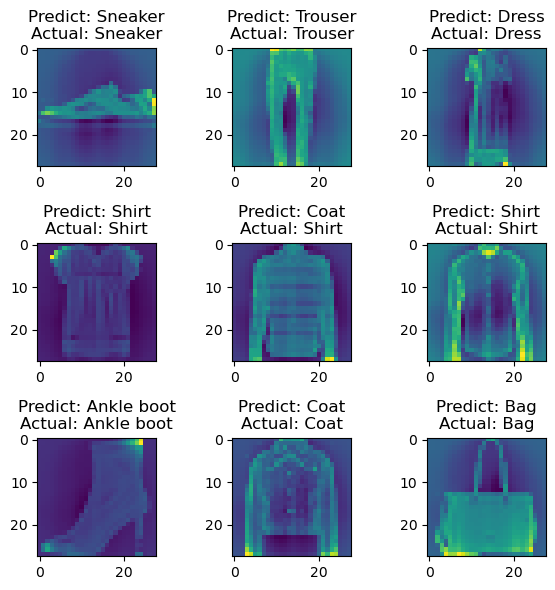

In [38]:
subplot_size = 3
mnist_datapoint_index = 0
fig, axes = plt.subplots(subplot_size, subplot_size, figsize=(6, 6))

for subp_1 in range(subplot_size):
    for subp_2 in range(subplot_size):
        
        axes[subp_1, subp_2].imshow(np.reshape(mnist_X_val[mnist_datapoint_index], (28, 28)))
        axes[subp_1, subp_2].set_title("Predict: " + label_description[Cs_val_pred[index_max_val_Cs_accuracy][mnist_datapoint_index]]
                                      + "\nActual: " + label_description[mnist_y_val[mnist_datapoint_index]])
        
        mnist_datapoint_index += 1

fig.tight_layout()

#### Confusion matrix of validation dataset based on based accuracy

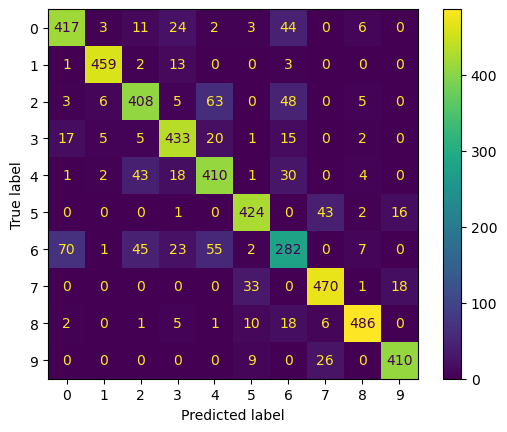

In [39]:
sklearn_cm = confusion_matrix(mnist_y_val, Cs_val_pred[index_max_val_Cs_accuracy])
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot();

**Observation:** The model makes the most mistakes on Label 6 ("Shirt"). The label that the model incorrectly predicts most often for "Shirt" is Label 2 ("Pullover") and Label 0 ("T-shirt/top").

### Tuning: Training data size
Make use of the regularization strength = 0.1 which gives the best accuracy from the previous section.

In [40]:
n_tr = [100, 1000, 5000, 10000, 20000, 52500]
Ns_train_accuracy = []
Ns_val_accuracy = []

Ns_train_pred = []
Ns_val_pred = []

for n in n_tr:
    classifier = LogisticRegression(C=0.1, penalty="l2", solver="sag", tol=0.1, random_state=seed)
    classifier.fit(mnist_X_tr[0:n, :], mnist_y_tr[0:n])
    
    Ns_train_pred.append(classifier.predict(mnist_X_tr))
    train_accuracy = classifier.score(mnist_X_tr[0:n, :], mnist_y_tr[0:n])
    Ns_train_accuracy.append(train_accuracy)
    
    Ns_val_pred.append(classifier.predict(mnist_X_val))
    val_accuracy = classifier.score(mnist_X_val, mnist_y_val)
    Ns_val_accuracy.append(val_accuracy)

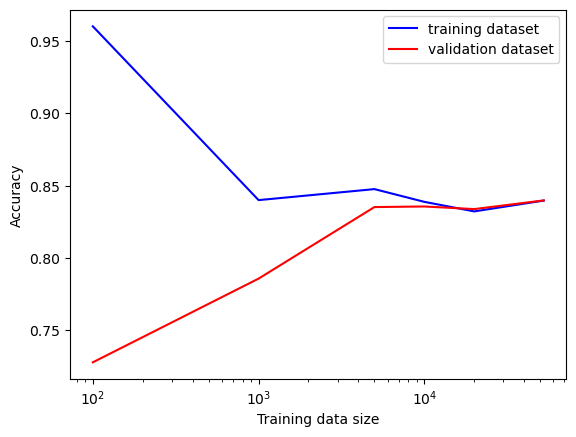

In [41]:
fig, axes = plt.subplots()

axes.set_xlabel('Training data size')
axes.set_ylabel('Accuracy')

axes.semilogx(n_tr, Ns_train_accuracy, color='blue', label='training dataset')
axes.semilogx(n_tr, Ns_val_accuracy, color='red', label='validation dataset')

axes.legend()

#### Maximum accuracy among training data size
Training accuracy:

In [58]:
max_training_Ns_accuracy = max(Ns_train_accuracy)
index_max_training_Ns_accuracy = Ns_train_accuracy.index(max_training_Ns_accuracy)
print("Max training accuracy =", max_training_Ns_accuracy)
print("Regularization strength =", n_tr[index_max_training_Ns_accuracy])

Max training accuracy = 0.8316190476190476
Regularization strength = 52500


Validation accuracy:

In [59]:
max_val_Ns_accuracy = max(Ns_val_accuracy)
index_max_val_Ns_accuracy = Ns_val_accuracy.index(max_val_Ns_accuracy)
print("Max validation accuracy =", max_val_Ns_accuracy)
print("Regularization strength =", n_tr[index_max_val_Ns_accuracy])

Max validation accuracy = 0.8332
Regularization strength = 52500


#### Visualizing predicted label on validation dataset based on best accuracy

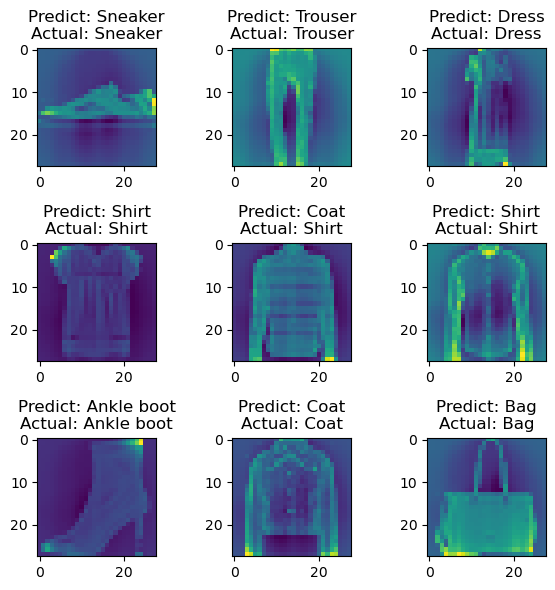

In [60]:
subplot_size = 3
mnist_datapoint_index = 0
fig, axes = plt.subplots(subplot_size, subplot_size, figsize=(6, 6))

for subp_1 in range(subplot_size):
    for subp_2 in range(subplot_size):
        
        axes[subp_1, subp_2].imshow(np.reshape(mnist_X_val[mnist_datapoint_index], (28, 28)))
        axes[subp_1, subp_2].set_title("Predict: " + label_description[Ns_val_pred[index_max_val_Ns_accuracy][mnist_datapoint_index]]
                                      + "\nActual: " + label_description[mnist_y_val[mnist_datapoint_index]])
        
        mnist_datapoint_index += 1

fig.tight_layout()

#### Confusion matrix of validation dataset based on based accuracy

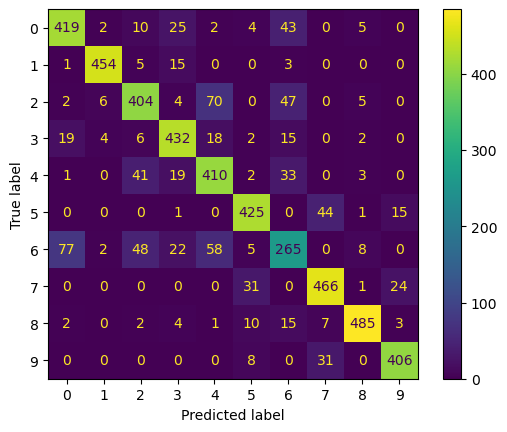

In [61]:
sklearn_cm = confusion_matrix(mnist_y_val, Ns_val_pred[index_max_val_Ns_accuracy])
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot();

**Observation:** The model makes the same mistake as regularization strength tuning. The most mistakes on Label 6 ("Shirt"). The label that the model incorrectly predicts most often for "Shirt" is Label 2 ("Pullover") and Label 0 ("T-shirt/top").

#### Examining Hyperarameters

In [29]:
classifier = LogisticRegression(C=0.1, penalty="l2", solver="sag", tol=0.1, random_state=seed)
classifier.fit(mnist_X_tr, mnist_y_tr)

LogisticRegression(C=0.1, random_state=1234, solver='sag', tol=0.1)

In [30]:
classifier.coef_.shape

(10, 784)

In [31]:
test_pred = classifier.predict(mnist_X_te)
train_pred = classifier.predict(mnist_X_tr)

In [32]:
test_accuracy = classifier.score(mnist_X_te, mnist_y_te)
test_accuracy

0.83704

In [33]:
train_accuracy = classifier.score(mnist_X_tr, mnist_y_tr)
train_accuracy

0.8396761904761905

In [ ]:
fig, axes = plt.subplots()

axes.set_title('Accuracy')

axes.semilogx(n_tr, Ns_train_accuracy, color='blue', label='training dataset')
axes.semilogx(n_tr, Ns_val_accuracy, color='red', label='validation dataset')

axes.legend()

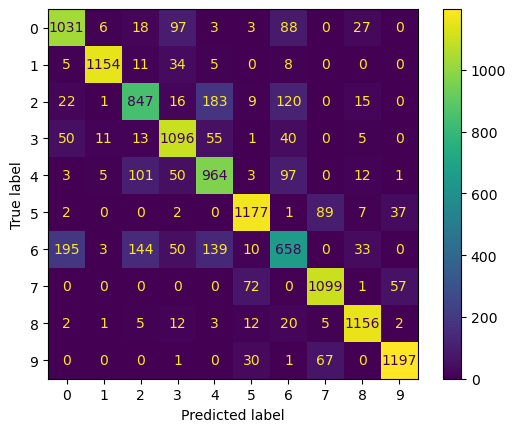

In [26]:
sklearn_cm = confusion_matrix(mnist_y_te, test_pred)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot();